In [ ]:
import numpy as np
import pandas as pd
import torch
import scipy
import matplotlib.pyplot as plt

plt.close("all")


In [ ]:
%pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import PyDP
import pydp as dp
# Import the Bounded Mean algorithm
from pydp.algorithms.laplacian import BoundedMean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Algos HW2.ipynb'		 __pycache__    yellow_cab_data.csv
'Data Analysis.ipynb'		 ron_gauss.py   yellow_cab_data.gsheet
'Data Science Hackathon.ipynb'	 Untitled


In [ ]:
#example statistics: mean, median, stddev

fare_df = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= ['fare_amount'])
print(fare_df)

mean_fare = fare_df.mean()
print(mean_fare)

median_fare = fare_df.median()
print(median_fare)

std_fare = fare_df.std()
print(std_fare)

variance_fare = fare_df.var()
print(variance_fare)

        fare_amount
0             14.00
1              4.50
2              5.50
3             15.00
4             18.50
...             ...
149995        24.63
149996         9.36
149997        10.40
149998        23.71
149999         8.00

[150000 rows x 1 columns]
fare_amount    12.789388
dtype: float64
fare_amount    9.0
dtype: float64
fare_amount    12.411326
dtype: float64
fare_amount    154.041015
dtype: float64


In [ ]:
#fare_df['fare2'] = fare_df.loc[:, 'fare_amount']
#print(fare_df)

In [ ]:
%pip install scipy

import importlib.util
import sys
spec = importlib.util.spec_from_file_location("ron_gauss.py", "/content/drive/MyDrive/Colab Notebooks/ron_gauss.py")
ron_gauss = importlib.util.module_from_spec(spec)
sys.modules["ron_gauss.py"] = ron_gauss
spec.loader.exec_module(ron_gauss)
#import ron_gauss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.linalg
#test data generation with ron gauss

X = np.random.normal(size=(1000,100))
dim = 10
# try unsupervised
rongauss_unsup = ron_gauss.RONGauss(algorithm='unsupervised')
dp_x, _ = rongauss_unsup.generate_dpdata(X, dim)


/content/drive/MyDrive/Colab Notebooks/ron_gauss.py:197: RuntimeWarning: covariance is not positive-semidefinite.
  synth_data = prng.multivariate_normal(np.zeros(p), cov_dp, n_samples)


In [ ]:
A = fare_df.values
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

def cov_calc(A):
  #check matrix A's shape, it should be (928991, 8)
  print(A.shape)
  # calculate the mean of each column
  M = mean(A.T, axis=1)
  print(M)
  # center columns by subtracting column means
  C = A - M
  print(C)
  # calculate covariance matrix of centered matrix
  V = cov(C.T)
  return(V)

X = fare_df
def synth_gauss(X):
  prng = np.random.RandomState(0)
  mean = X.mean()
  print(mean)
  cov_matrix = cov_calc(X)
  print(cov_matrix)
  (n, p) = X.shape
  noise_var = (2.0 * np.sqrt(p)) / (n * cov_matrix)
  print(noise_var)
  laplace_noise = prng.laplace(scale=noise_var, size=(p, p))
  cov_dp = cov_matrix + laplace_noise
  mu, sigma = 0, 0.1
  noise = np.random.laplace(mu, sigma, (n, p))
  X = X + noise
  synth_data = prng.multivariate_normal(mean, cov_dp, n)
  x_dp = synth_data
  return x_dp

In [ ]:
def pre_processing(X, epsilon_mean, prng=None):
  if prng is None:
            prng = np.random.RandomState()
  (n, m) = X.shape
  # pre-normalize
  x_norm = ron_gauss.RONGauss._normalize_sample_wise(X)
  # derive dp-mean
  mu = np.mean(x_norm, axis=0)
  noise_var_mu = np.sqrt(m) / (n * epsilon_mean)
  laplace_noise = prng.laplace(scale=noise_var_mu, size=m)
  mean_dp = mu + laplace_noise
  # centering
  x_bar = x_norm - mean_dp
  # re-normalize
  x_bar = ron_gauss.RONGauss._normalize_sample_wise(x_bar)
  return x_bar, mean_dp

In [ ]:
def ron_projection(x_bar, dimension, prng=None):
  (n, m) = x_bar.shape
  random_matrix = prng.uniform(size=(m, m))
  q_matrix, r_matrix = scipy.linalg.qr(random_matrix)
  full_projection_matrix = q_matrix
  ron_matrix = full_projection_matrix[0:dimension]  # take the rows
  x_tilda = np.inner(x_bar, ron_matrix)
  return x_tilda, ron_matrix

In [ ]:
X = fare_df
x1 = synth_gauss(X)

fare_amount    12.789388
dtype: float64
(150000, 1)
fare_amount    12.789388
dtype: float64
        fare_amount
0          1.210612
1         -8.289388
2         -7.289388
3          2.210612
4          5.710612
...             ...
149995    11.840612
149996    -3.429388
149997    -2.389388
149998    10.920612
149999    -4.789388

[150000 rows x 1 columns]
154.04101498373186
8.655703375326017e-08


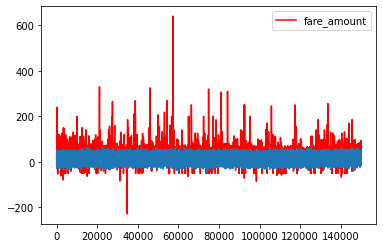

In [ ]:
fare_df.plot(c = "red")
plt.plot(x1)
plt.show()
x_dp = x1

In [ ]:
def print_statistics(x1, ogx1):
  ogx1.plot(c = "red")
  plt.plot(x1)
  plt.show()
  print(x1.mean())
  print(ogx1.mean())
  print(np.median(x1))
  print(ogx1.median())
  print(x1.std())
  print(ogx1.std())
  df = pd.DataFrame(x1, columns = ['fare_amount'])
  return df

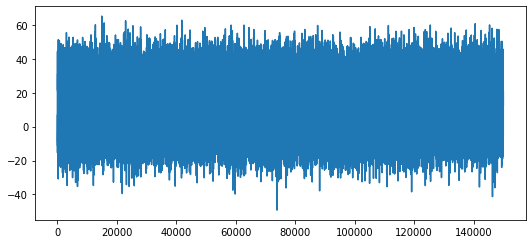

In [ ]:
plt.plot(x1)

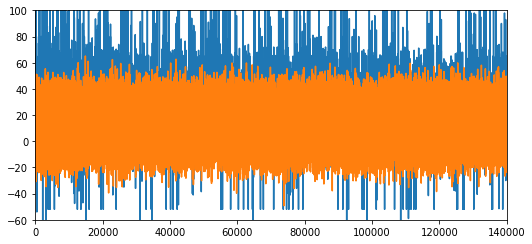

In [ ]:
plt.xlim([0,140000]) and plt.ylim([-60,100])
plt.plot(fare_df)
plt.plot(x1)

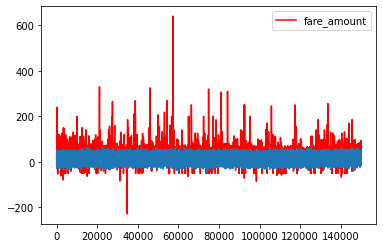

12.818156273481694
fare_amount    12.789388
dtype: float64
12.850569565760537
fare_amount    9.0
dtype: float64
12.404937563994121
fare_amount    12.411326
dtype: float64


In [ ]:
df1 = print_statistics(x1, fare_df)

tip_amount    2.386165
dtype: float64
(150000, 1)
tip_amount    2.386165
dtype: float64
        tip_amount
0        -2.386165
1        -0.726165
2        -0.066165
3        -2.386165
4         2.073835
...            ...
149995   -0.386165
149996   -1.036165
149997   -0.926165
149998    5.303835
149999    0.003835

[150000 rows x 1 columns]
7.176635607258298
1.8578807763136647e-06


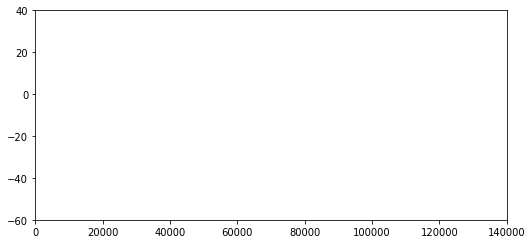

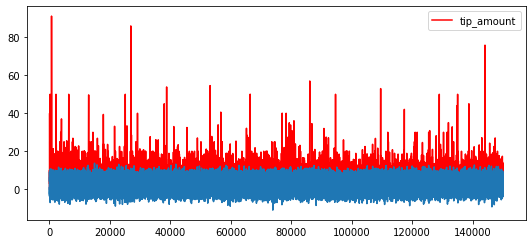

2.39237504492608
tip_amount    2.386165
dtype: float64
2.3993712964278666
tip_amount    2.0
dtype: float64
2.6775454438581754
tip_amount    2.678924
dtype: float64


In [ ]:
tip_df = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= ['tip_amount'])
X = tip_df
x2 = synth_gauss(X)
plt.xlim([0,140000]) and plt.ylim([-60,40])

df1 = print_statistics(x2, tip_df)


trip_distance    6.176475
dtype: float64
(150000, 1)
trip_distance    6.176475
dtype: float64
        trip_distance
0           -1.956475
1           -5.486475
2           -5.306475
3           -3.146475
4           -1.616475
...               ...
149995      -0.596475
149996      -4.506475
149997      -4.156475
149998      -1.336475
149999      -4.856475

[150000 rows x 1 columns]
297288.6870061443
4.4849783782918594e-11


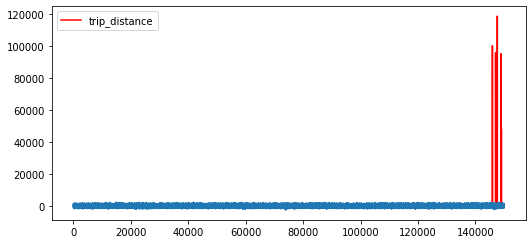

7.44031135162797
trip_distance    6.176475
dtype: float64
8.864259420836186
trip_distance    1.74
dtype: float64
544.9612073015976
trip_distance    545.241861
dtype: float64


In [ ]:
dist_df = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= ['trip_distance'])
#X1 = dist_df
x3 = synth_gauss(dist_df)
df2 = print_statistics(x3, dist_df)


payment_type    1.19406
dtype: float64
(150000, 1)
payment_type    1.19406
dtype: float64
        payment_type
0            0.80594
1           -0.19406
2           -0.19406
3            0.80594
4           -0.19406
...              ...
149995      -1.19406
149996      -1.19406
149997      -1.19406
149998      -1.19406
149999      -1.19406

[150000 rows x 1 columns]
0.2508023884159137
5.316270477943869e-05


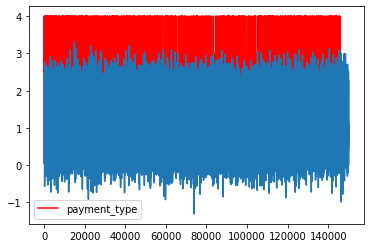

1.1952208395968473
payment_type    1.19406
dtype: float64
1.1965287425547428
payment_type    1.0
dtype: float64
0.5005494163594597
payment_type    0.500802
dtype: float64


,fare_amount
0,2.0
1,2.0
2,0.0
3,2.0
4,1.0
...,...
149995,1.0
149996,2.0
149997,1.0
149998,1.0


In [ ]:
payment_type = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= ['payment_type'])
X1 = payment_type
x3 = synth_gauss(X1)
np.around(x3)
df2 = print_statistics(x3, payment_type)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9c34253280> (for post_execute):



KeyboardInterrupt



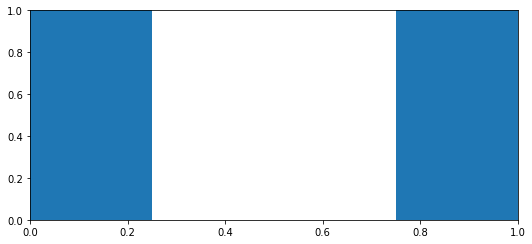

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

#tempName = "payment_type"

#col = pd.read_csv("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= [tempName])

df = pd.DataFrame(df2)
df.value_counts().plot(ax=ax , kind='bar', xlabel='Payment Type', ylabel='Frequency')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
#tempName = "fare_amount"

#col1 = pd.read_csv("yellow_cab_data.csv" , usecols= [tempName])

tempName = "fare_amount"

col2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/yellow_cab_data.csv" , usecols= [tempName])

print(df1.corrwith(col2, axis = 0))


fare_amount   -0.000437
dtype: float64
